In [243]:
import numpy as np
import matplotlib.pyplot as plt

In [244]:
## Enter required 4 digit airfoil here
NACA_airfoil = "4412"  # 4-digit airfoil

In [245]:
c = 1       # by default chord(c) is set to 1; so x = c, x/c = 1

In [246]:
## 4-digit airfoil properties
M = int(NACA_airfoil[0]) * (c/100)    # max camber
P = int(NACA_airfoil[1]) * (c/10)     # max camber location from leading edge
T = int(NACA_airfoil[2:4]) * (c/100)  # max thickness
print(f"M = {M},  P = {P},  T = {T}")

M = 0.04,  P = 0.4,  T = 0.12


In [247]:
## constants
a0 = 0.2969;
a1 = -0.1260;
a2 = -0.3516;
a3 = 0.2843;
#a4 = -0.1015;       # Open trailing edge
a4 = -0.1036;     # Closed trailing edge

In [248]:
## grid points for iteration
points = 500
x = np.linspace(0,c,points)

In [249]:
## Camber and Gradient   # placeholders 
yc = np.zeros((points))
dyc_dx = np.zeros((points))
theta = np.zeros((points))

In [250]:
for i in range(0,points):
    if (x[i]>=0 and x[i]<P):
        yc[i] = (M/(P**2))*((2*P*x[i])-(x[i]**2))
        dyc_dx[i] = ((2*M)/(P**2))*(P-x[i])
    elif (x[i]>=P and x[i]<=1):
        yc[i] = (M/((1-P)**2))*(1-(2*P)+(2*P*x[i])-(x[i]**2))
        dyc_dx[i] = ((2*M)/((1-P)**2))*(P-x[i])
    theta[i] = np.arctan(dyc_dx[i])

In [251]:
## Thickness Distribution
yt = 5*T*((a0*np.sqrt(x)) + (a1*x) + (a2*(x**2)) + (a3*(x**3)) + (a4*(x**4)))

In [252]:
## Upper surface points
xu = x - (yt * np.sin(theta))
yu = yc + (yt* np.cos(theta))

In [253]:
## Lower surface points
xl = x + (yt * np.sin(theta))
yl = yc - (yt * np.cos(theta))

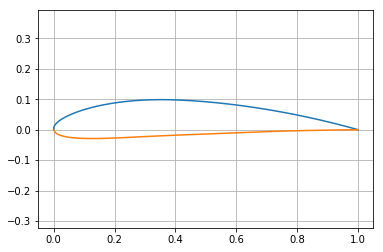

In [254]:
## Plot the airfoil
plt.plot(xu,yu, label = 'upper surface')
plt.plot(xl,yl, label = 'lower surface')
plt.grid()
plt.axis('equal')
plt.show()

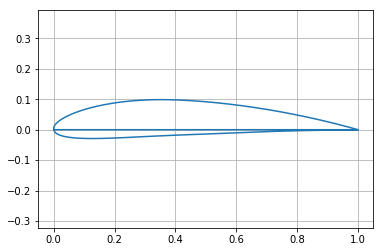

In [255]:
## plot the airfoil   #useful for exporting data in csv file
x_cord = np.concatenate((xu,xl));  # array concatenation like python list
y_cord = np.concatenate((yu,yl));
plt.plot(x_cord, y_cord)
plt.grid()
plt.axis('equal')
plt.show()

In [256]:
## for exporting airfoil data into csv file
f = x_cord.reshape(1000,1).ravel()   # ravel produces 1D array from 2D array
f2 = y_cord.reshape(1000,1).ravel()
f3 = np.vstack((f, f2)).T           # make 2d array from two 1D array
data = np.asarray(f3)
np.savetxt(f"NACA{NACA_airfoil}_plotting_data.csv", data, delimiter=",")

In [257]:
## for abover formulas looks at https://en.wikipedia.org/wiki/NACA_airfoil